In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# The number of neurons
num_neurons = np.power(10, 2)

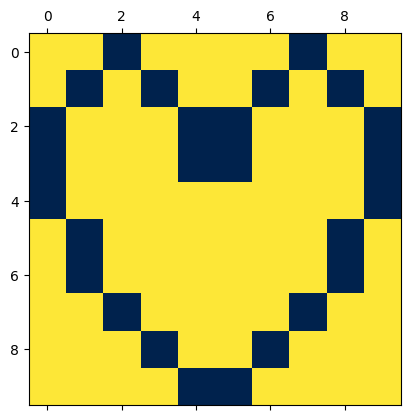

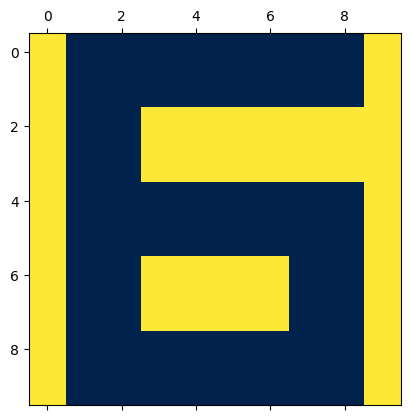

In [77]:
# Image shape:
img_shape = (10, 10)
# Load images to be memorized
img1_data = np.loadtxt('heart.csv', delimiter=',')
img1_arr = img1_data.flatten()
img2_data = np.loadtxt('six.csv', delimiter=',')
img2_arr = img2_data.flatten()
# Show the image2
plt.matshow(img1_data, cmap='cividis')
plt.matshow(img2_data, cmap='cividis')

In [78]:
# Connect the neurons in a complete graph
# Training
W1 = np.matmul(img1_arr[:, np.newaxis], img1_arr[np.newaxis, :])
np.fill_diagonal(W1, 0)
W2 = np.matmul(img2_arr[:, np.newaxis], img2_arr[np.newaxis, :])
np.fill_diagonal(W2, 0)
W = (W1 + W2) / num_neurons

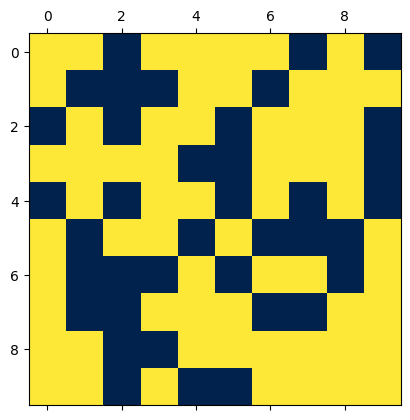

In [81]:
# Add noise to an image
# TODO 
#    Choose an image
chosen_img_arr = img1_arr
# chosen_img_arr = img2_arr
# TODO
#    Determine noise ratio
noise_ratio = 0.2
noise_idx = np.random.choice(range(len(chosen_img_arr)), np.floor(len(chosen_img_arr) * noise_ratio).astype(int), replace=False)
noise_arr = np.asarray([(-1 if chosen_img_arr[i] > 0 else 1) if i in noise_idx else 0 for i in range(len(chosen_img_arr))])
noisey_img_arr = np.asarray([(-1 if chosen_img_arr[i] > 0 else 1) if i in noise_idx else chosen_img_arr[i] for i in range(len(chosen_img_arr))])
# Show the noisy image
plt.matshow(noisey_img_arr.reshape(10, 10), cmap='cividis')

Recovered at the 1 th step.


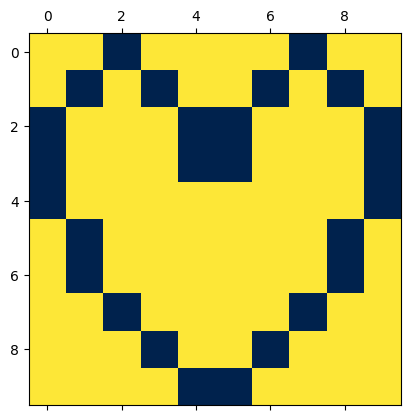

In [82]:
# Inference
rec_arr = noisey_img_arr
# Iteratively recall the image
for i in range(10):
    rec_arr = np.matmul(W, rec_arr)
    rec_arr = np.where(rec_arr >= 0, 1, rec_arr)
    rec_arr = np.where(rec_arr < 0, -1, rec_arr)
    if (rec_arr == img_arr).all():
        print('Recovered at the %s th step.' % (i+1))
        break
# Recover the image
rec_data = rec_arr.reshape(img_shape)
# Show the recovered image
plt.matshow(rec_data, cmap='cividis')